# Instagram Usage & Lifestyle Patterns Analysis
The goal of this project is to perform a descriptive exploratory data analysis (EDA) on a large Instagram usage dataset (~1.55M users) to understand user demographics, daily activity, lifestyle behaviors, and network characteristics. The analysis aims to reveal distributional patterns, group differences, and compositional insights without making causal claims, providing a clear, data-driven overview of how Instagram usage relates to lifestyle metrics.


## Step 1: Import Libraries
We'll import the required libraries necessary for data manipulation, visualization and analysis.

In [ ]:
# Importing Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Step 2: Load Dataset
In this step, we load our social media data into a Pandas DataFrame and take a quick look at its structure.


In [7]:
# Loading the dataset
df = pd.read_csv('data/instagram_usage_lifestyle.csv') # Replace with your actual file path


In [8]:
# Take a look at the first few rows of the dataset
display(df.head())
print
# Display basic information about the dataset
print(df.info())

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547896 entries, 0 to 1547895
Data columns (total 58 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_id                         1547896 non-null  int64  
 1   app_name                        1547896 non-null  object 
 2   age                             1547896 non-null  int64  
 3   gender                          1547896 non-null  object 
 4   country                         1547896 non-null  object 
 5   urban_rural                     1547896 non-null  object 
 6   income_level                    1547896 non-null  object 
 7   employment_status               1547896 non-null  object 
 8   education_level                 1547896 non-null  object 
 9   relationship_status             1547896 non-null  object 
 10  has_children                    1547896 non-null  object 
 11  exercise_hours_per_week         1547896 non-null  float64
 12  

# Step 3: Distribution Analysis & Demographic Overview
In this step, we examine the distribution of key variables such as age, gender, country, and engagement metrics.  
We also provide a demographic overview of our users.

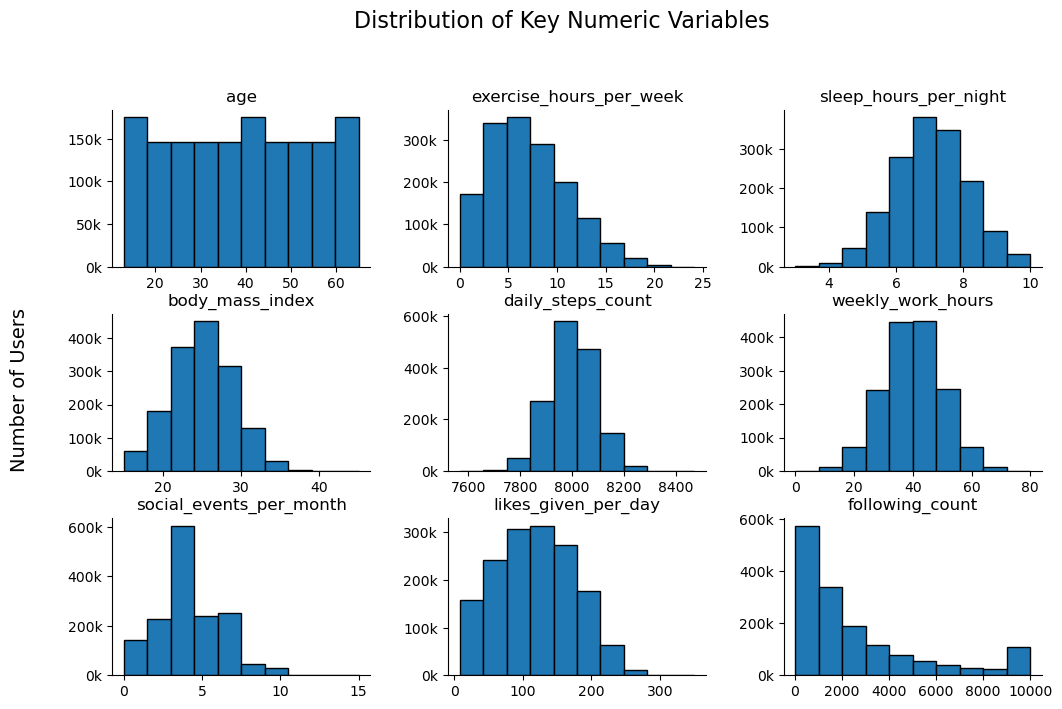

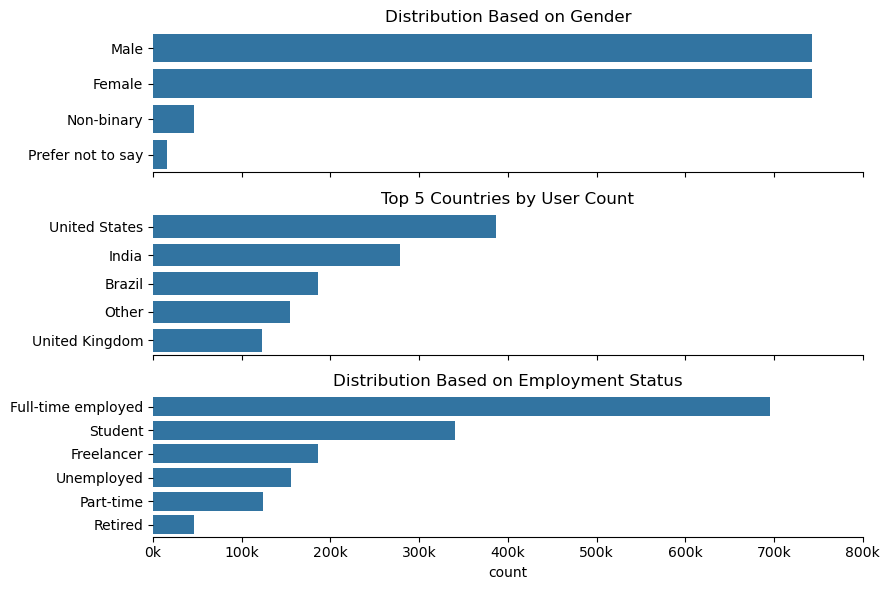

,age,exercise_hours_per_week,sleep_hours_per_night,body_mass_index,daily_steps_count,weekly_work_hours,social_events_per_month,likes_given_per_day,following_count
count,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06
mean,3.898544e+01,7.143480e+00,6.999384e+00,2.500084e+01,8.000105e+03,4.000145e+01,3.998807e+00,1.191122e+02,2.604942e+03
std,1.529453e+01,3.994556e+00,1.097098e+00,3.976188e+00,8.939761e+01,9.997320e+00,2.000449e+00,5.614637e+01,2.751922e+03
min,1.300000e+01,0.000000e+00,3.000000e+00,1.500000e+01,7.566000e+03,0.000000e+00,0.000000e+00,8.000000e+00,2.000000e+01
25%,2.600000e+01,4.000000e+00,6.300000e+00,2.230000e+01,7.940000e+03,3.320000e+01,3.000000e+00,7.500000e+01,6.630000e+02
50%,3.900000e+01,6.600000e+00,7.000000e+00,2.500000e+01,8.000000e+03,4.000000e+01,4.000000e+00,1.180000e+02,1.519000e+03
75%,5.200000e+01,9.700000e+00,7.700000e+00,2.770000e+01,8.060000e+03,4.680000e+01,5.000000e+00,1.610000e+02,3.451000e+03
max,6.500000e+01,2.410000e+01,1.000000e+01,4.500000e+01,8.473000e+03,8.000000e+01,1.500000e+01,3.500000e+02,1.000000e+04


In [9]:
# Setting Top 5 Countries by User Count as a Variable
top_5_countries = df['country'].value_counts().head(5).index


# Defining Numeric Columns
numeric_cols = ['age', 'exercise_hours_per_week', 'sleep_hours_per_night', 
                'body_mass_index', 'daily_steps_count', 'weekly_work_hours', 
                'social_events_per_month', 'likes_given_per_day', 'following_count']

# Plotting Histograms for Numeric Variables
axes = df[numeric_cols].hist(bins=10, figsize=(12, 10), layout=(4, 3), sharey=False, edgecolor='black')
plt.suptitle("Distribution of Key Numeric Variables", fontsize=16)
for ax in axes.flat:
   ax.grid(False)
   ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.figtext(0.04, 0.6, 'Number of Users', va='center', rotation='vertical', fontsize=14)
sns.despine()
plt.show()

print("\n")

# Categorical Variables Analysis

# Create subplots: 3 rows, 1 column, shared x-axis
fig, ax = plt.subplots(3, 1, figsize=(9, 6), sharex=True)

# Plot 1: Distribution by Gender
sns.countplot(data=df, y='gender', ax=ax[0], order=df['gender'].value_counts().index)
ax[0].set_xlim(0, 800000)
ax[0].set_title('Distribution Based on Gender')
ax[0].set_xlabel('User Count')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Plot 2: Top 5 Countries by User Count
sns.countplot(data=df, y='country', ax=ax[1], order=top_5_countries)
ax[1].set_title('Top 5 Countries by User Count')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Plot 3 Distribution by Employment Status
sns.countplot(data=df, y='employment_status', ax=ax[2], order=df['employment_status'].value_counts().index)
ax[2].set_title('Distribution Based on Employment Status')
ax[2].set_ylabel('')
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))


# Adjust layout and display plots
sns.despine(left=True)
plt.tight_layout()
plt.show()

# Statistical Summary of Numeric Variables
df[numeric_cols].describe()

## Step 4: Distribution of Instagram Usage Per Day
Daily Usage Length and visualize both the distribution of Daily Usage durations and the distribution of Daily Usage Categories on Instagram.

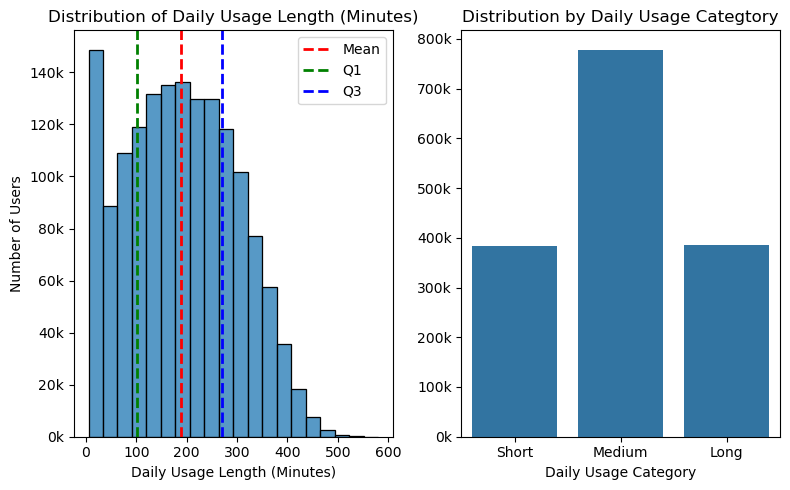

In [10]:
# Calculate statistics
mean_val = df['daily_active_minutes_instagram'].mean()
q1 = df['daily_active_minutes_instagram'].quantile(0.25)
q3 = df['daily_active_minutes_instagram'].quantile(0.75)

# Creating Daily Usage Category based on Daily Usage Category
df['daily_usage_category'] = np.where(
    df['daily_active_minutes_instagram'] > q3, 'Long',
    np.where(df['daily_active_minutes_instagram'] < q1, 'Short', 'Medium')
)

# Visualizing Daily Usage Length and Daily Usage Category
# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1 ,2, figsize=(8, 5))

# Plot 1: Distribution of Daily Usage Length
sns.histplot(data=df, x='daily_active_minutes_instagram', kde=False, ax=ax[0], bins=20)
ax[0].set_title('Distribution of Daily Usage Length (Minutes)')
ax[0].set_xlabel('Daily Usage Length (Minutes)')
ax[0].set_ylabel('Number of Users')
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Add vertical lines for mean, Q1, and Q3
ax[0].axvline(mean_val, color='red', linestyle='--', label='Mean', linewidth=2)
ax[0].axvline(q1, color='green', linestyle='--', label='Q1', linewidth=2)
ax[0].axvline(q3, color='blue', linestyle='--', label='Q3', linewidth=2)
ax[0].legend()

# Plot 2: Distribution by Daily Usage Category
sns.countplot(data=df, x='daily_usage_category', order=['Short', 'Medium', 'Long'], ax=ax[1])
ax[1].set_title('Distribution by Daily Usage Categtory')
ax[1].set_xlabel('Daily Usage Category')
ax[1].set_ylabel('')
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Adjust layout and display plots
plt.tight_layout()
plt.show()

## Step 5: Lifestyle Differences by Social Media Usage

In this step, we explore whether daily life habits differ across users with different levels of social media usage. Instead of simply describing habits on their own, we directly compare lifestyle behaviors between Short, Medium, and Long usage groups to see if heavier usage is associated with noticeable changes in routines.

This step helps us understand whether lifestyle habits appear to change alongside heavier social media engagement.


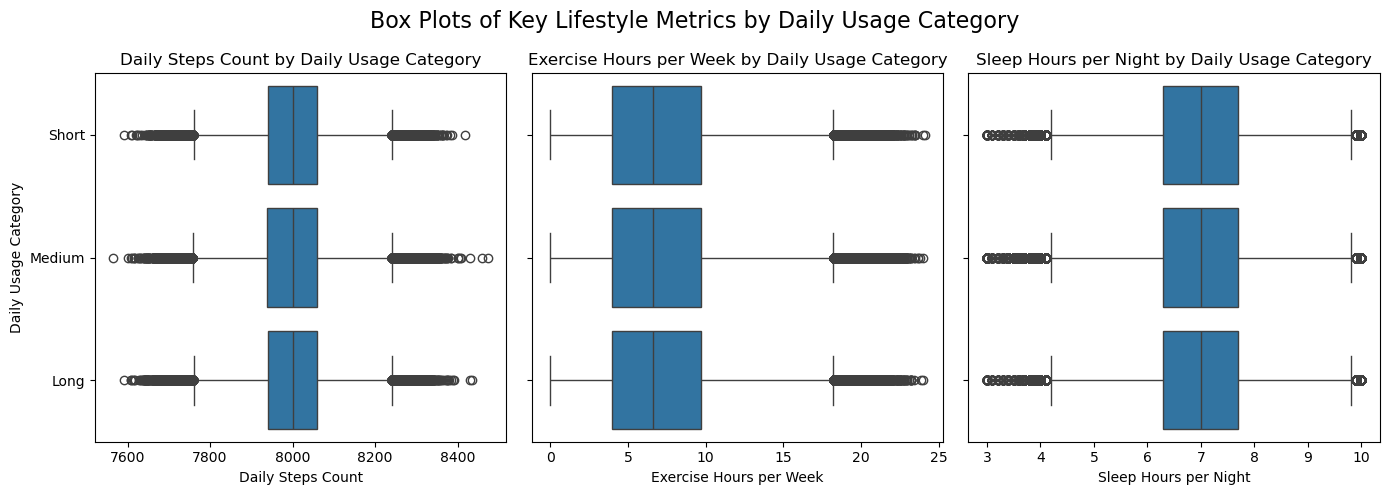

In [11]:
# Box Plots: Lifestyle Metrics vs Daily Usage Category
fig, ax = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

# Plot 1: Daily Steps Count by Daily Usage Category
sns.boxplot(data=df, x='daily_steps_count', y='daily_usage_category', order=['Short', 'Medium', 'Long'], ax=ax[0])
ax[0].set_title('Daily Steps Count by Daily Usage Category')
ax[0].set_xlabel('Daily Steps Count')
ax[0].set_ylabel('Daily Usage Category')

# Plot 2: Exercise Hours per Week by Daily Usage Category
sns.boxplot(data=df, x='exercise_hours_per_week', y='daily_usage_category', order=['Short', 'Medium', 'Long'], ax=ax[1])
ax[1].set_title('Exercise Hours per Week by Daily Usage Category')
ax[1].set_xlabel('Exercise Hours per Week')
ax[1].set_ylabel('')

# Plot 3: Sleep Hours per Night by Daily Usage Category
sns.boxplot(data=df, x='sleep_hours_per_night', y='daily_usage_category', order=['Short', 'Medium', 'Long'], ax=ax[2])
ax[2].set_title('Sleep Hours per Night by Daily Usage Category')
ax[2].set_xlabel('Sleep Hours per Night')
ax[2].set_ylabel('')

# Adjust layout and display plots
fig.suptitle('Box Plots of Key Lifestyle Metrics by Daily Usage Category', fontsize=16)
plt.tight_layout()
plt.show()

## Step 6: Exploring Interesting and Unexpected Patterns

In this section, we look beyond general usage behavior to explore whether there are any surprising or unusual trends in the dataset.

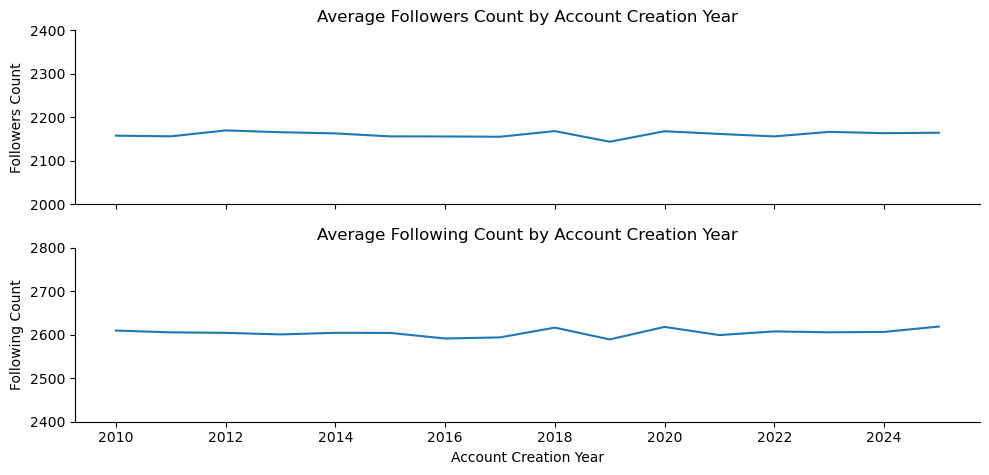

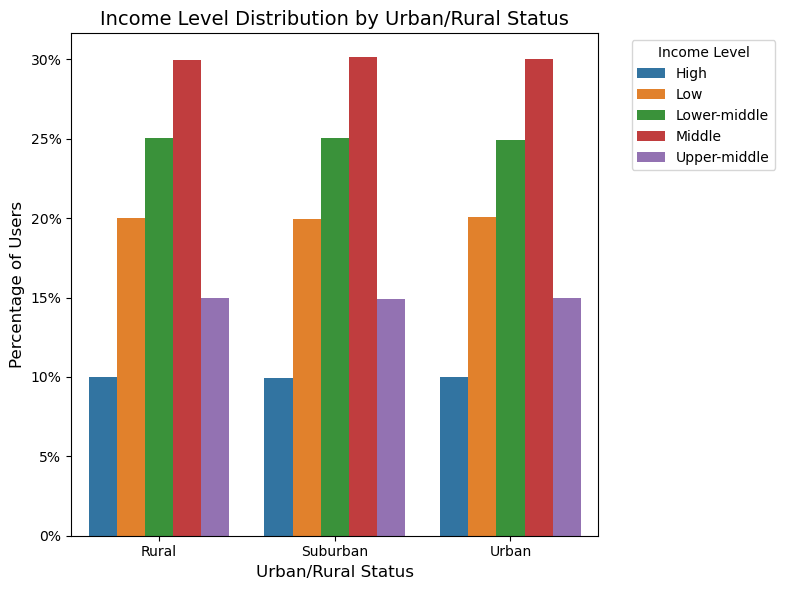

In [12]:
# Grouped DataFrames with clearer names
df_followers_by_year = (
    df.groupby('account_creation_year')['followers_count']
      .mean()
      .reset_index()
)

df_following_by_year = (
    df.groupby('account_creation_year')['following_count']
      .mean()
      .reset_index()
)

# Figure layout
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

# Followers Line Chart
sns.lineplot(
    data=df_followers_by_year,
    x='account_creation_year',
    y='followers_count',
    ax=ax[0]
)
ax[0].set_title('Average Followers Count by Account Creation Year')
ax[0].set_ylabel('Followers Count')
ax[0].set_ylim(2000, 2400)

# Following Line Chart
sns.lineplot(
    data=df_following_by_year,
    x='account_creation_year',
    y='following_count',
    ax=ax[1]
)
ax[1].set_title('Average Following Count by Account Creation Year')
ax[1].set_ylabel('Following Count')
ax[1].set_xlabel('Account Creation Year')
ax[1].set_ylim(2400, 2800)

# Final Touches
fig.suptitle('')
sns.despine()
plt.tight_layout()
plt.show()

print("\n")
# Analyzing Income Level Distribution by Urban/Rural Status

# Group the data by 'urban_rural' and 'income_level' and count the number of occurrences
df_income_level = df.groupby(['urban_rural', 'income_level']).size().reset_index(name='count')

# Calculate percentage within each 'urban_rural' group
df_income_level['percentage'] = df_income_level.groupby('urban_rural')['count'].transform(
    lambda x: x / x.sum() * 100
)

# Optional: round percentage to 2 decimal places
df_income_level['percentage'] = df_income_level['percentage'].round(2)

# Plotting
plt.figure(figsize=(8, 6))

# Create a bar plot showing the percentage of each income level for Urban vs Rural
sns.barplot(
    data=df_income_level,
    x='urban_rural',
    y='percentage',
    hue='income_level'
)

# Get the current axes
ax = plt.gca()

# Format y-axis labels as percentages without decimals
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))

# Set plot titles and labels
ax.set_title('Income Level Distribution by Urban/Rural Status', fontsize=14)
ax.set_ylabel('Percentage of Users', fontsize=12)
ax.set_xlabel('Urban/Rural Status', fontsize=12)

# Move legend outside the plot
plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


# Step 7: Instagram Usage & Lifestyle EDA Summary

This notebook presents an **exploratory data analysis** of a large Instagram usage and lifestyle dataset (~1.55M users). The analysis focuses on **distributional patterns**, **group comparisons**, and **within-group composition**, without attempting causal inference.  

---

## 1. Distribution & Demographic Overview

* Numeric variables such as **age, exercise hours, sleep hours, BMI, steps, work hours, and engagement metrics** show **tight, controlled distributions**, with means and medians closely aligned.
* Several variables (e.g., daily steps, weekly work hours) exhibit **low variance**, suggesting they may be synthetically constrained or standardized rather than naturally dispersed.
* Gender, employment status, and country distributions are **uneven**, indicating that some categories are much more represented than others in the dataset.
* The top 5 countries account for a substantial portion of users, reinforcing that geographic representation is not uniform.  

---

## 2. Daily Instagram Usage Categorization

* Daily Instagram usage was divided into **Short, Medium, and Long** categories using the **25th and 75th percentiles**, not arbitrary thresholds.
  * “Short” and “Long” users represent the lower and upper tails of usage.
  * The “Medium” group contains the central mass of users.
* The histogram shows a **single-peaked distribution** of daily active minutes, rather than distinct usage clusters.  

---

## 3. Lifestyle Metrics vs Usage Category

* Boxplots comparing **daily steps**, **exercise hours**, and **sleep hours** across usage categories show:
  * **Very similar medians** across Short, Medium, and Long users.
  * **Substantial overlap** in interquartile ranges.
* Any differences between usage groups are **small relative to overall variation**.
* This suggests that, in this dataset, **heavier Instagram usage is not strongly associated with major changes** in these lifestyle metrics.  

---

## 4. Account Creation Year vs Network Size

* Line plots of **average followers** and **average following** by account creation year show:
  * Mild variation over time rather than strong monotonic trends.
  * Newer accounts do **not consistently** have fewer followers or followings than older ones.
* This indicates that **account age alone does not explain network size** in this dataset.  

---

## 5. Income Level Distribution by Urban/Rural Status

* Income levels were analyzed using **within-group percentages**, not raw counts.
* The bar chart shows that:
  * Both urban and rural users are spread across **all income categories**.
  * No single income level overwhelmingly dominates either group.
  * Differences between urban and rural users are **compositional**, not extreme.
* This normalization step is essential, as raw counts would misrepresent these comparisons due to group size differences.  

---

## 6. Data Restraints

* Many numeric variables are **narrowly distributed** and may have been **standardized or synthetically constrained**.
* Some categories (e.g., gender, country, employment status) are **unevenly represented**, limiting generalizability.
* Observed patterns are **descriptive**, and no causal inference should be drawn.
* Differences between groups are **subtle**, and overlapping distributions suggest that lifestyle metrics are not strongly differentiated by Instagram usage alone.  

---

## Overall Conclusion

Across all sections, the analysis shows that:

* Many variables exhibit **controlled, narrowly distributed values**.
* Group comparisons (usage level, urban vs rural) reveal **differences in composition**, but **not large separations** in central tendencies.
* Lifestyle behaviors appear **largely similar across usage intensity groups**, based on overlapping distributions.

Overall, this notebook is best characterized as a **descriptive, structure-focused EDA**, demonstrating:

* Proper use of percentile-based categorization
* Within-group normalization for fair comparisons
* Careful visualization choices that avoid overstating differences
